# EDA - Part 2

Data Transformation

Feature Engineering

Exploration Insights

Feature Selection

Data Preprocession in insurance industry

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Why Data Transformation is required?

It is the process of convering the raw data into a more suitable format of scale to improve performance and accuracy in analytical models.

Why important?
- Reduces Skewness: Many real-world numerical features (like income or charges) are right-skewed.
- Improves Model Performance: Linear Models assume normality and homoscedasticity; tranformaiton helps..
- Brings all features to comparable Scale: This avoids bias toward high-magnitude features.
- Handles Outliers Gently: Some transformaions compress the effect of large values.



### Common Types of Transformations 

When to use ?

1. Log - Right-skewed data (eg - income, charges)
2. Box-Cox - Positive values only; used when log isn't enough
3. Z-score - When detecting outliers using standard deviation
4. Min-Max - When scaling is needed between 0 and 1.
5. Power Transform - Automatically selects best between log/ sqrt.

<Axes: xlabel='charges', ylabel='Count'>

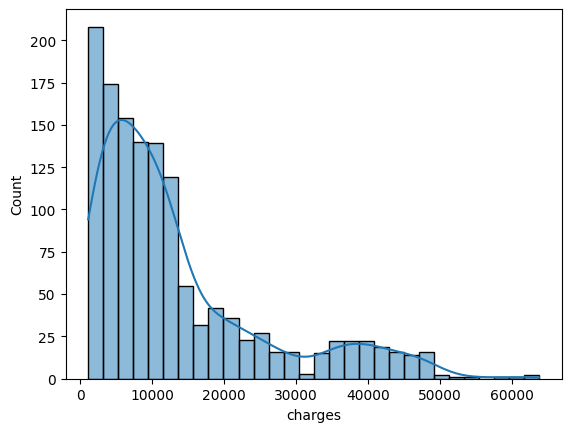

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['charges'], kde=True)

as there is very less data on right - is it right skewed plot

- and for the right skewed data, we go with log

In [7]:
from scipy.stats import boxcox
df['bmi_boxcox'], fitted_lambda = boxcox(df['bmi'] + 1) # adding 1 to avoid zero values

<Axes: xlabel='log_charges', ylabel='Count'>

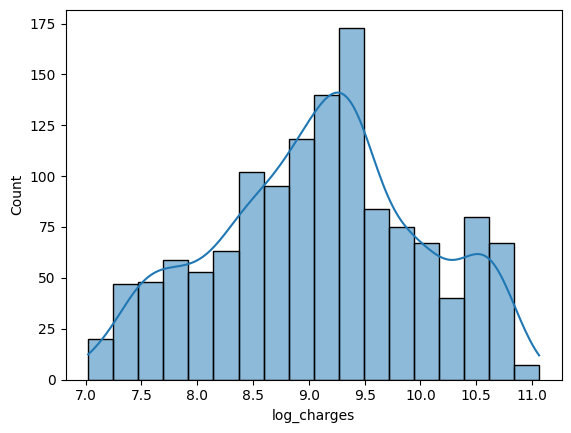

In [8]:
df['log_charges'] = np.log(df['charges'])
sns.histplot(df['log_charges'], kde=True)

it is now converted into normal distribution

In [10]:
df.shape

(1338, 9)

#### Inference - 

Transformed distribution is more symetric,which is better for regression and visualization.

In Statistics whenever histogram is showing data distribution in form of bell shape curve, it is normal distribution, otherwise skewed distribution

# Feature Engineering
- Create meaningful features

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_boxcox,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,7.763291,9.734176
1,18,male,33.770,1,no,southeast,1725.55230,8.618976,7.453302
2,28,male,33.000,3,no,southeast,4449.46200,8.511576,8.400538
3,33,male,22.705,0,no,northwest,21984.47061,6.920914,9.998092
4,32,male,28.880,0,no,northwest,3866.85520,7.912470,8.260197


Creating a new column from original coloums is feature engineering

In [12]:
df['bmi-cat'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, 29.9, np.inf], labels=['Underweight', 'Normal weight', 'Overweight', 'Obesity'])

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_boxcox,log_charges,bmi-cat
0,19,female,27.900,0,yes,southwest,16884.92400,7.763291,9.734176,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,8.618976,7.453302,Obesity
2,28,male,33.000,3,no,southeast,4449.46200,8.511576,8.400538,Obesity
3,33,male,22.705,0,no,northwest,21984.47061,6.920914,9.998092,Normal weight
4,32,male,28.880,0,no,northwest,3866.85520,7.912470,8.260197,Overweight


# Data Distribution Analysis
Transformed distributions help us better understand data patters and reduce skewness.

Boxplots are ideal for comparing how different groups affect a continuous variable.

<Axes: xlabel='log_charges', ylabel='Count'>

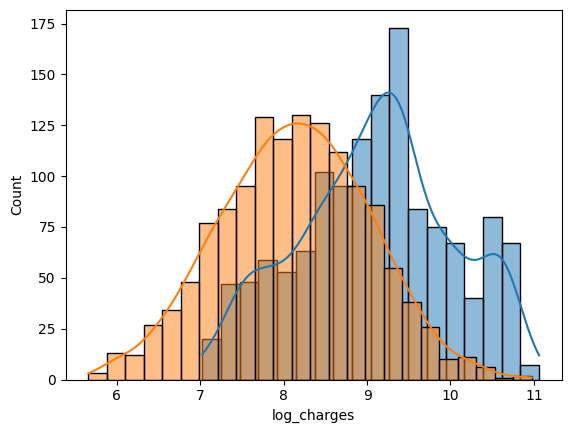

In [14]:
#Distribution plots

sns.histplot(df['log_charges'], kde=True)
sns.histplot(df['bmi_boxcox'], kde=True)

### Inference

This plot shows the distribution of expenses after applying a log transformation. 

Originally, the data was right-skewed, meaning most people had low expenses but a few had very high ones.

Log transformation makes the distribution more normal and symmetric - ideal for many statistical and machine learning models.



<Axes: xlabel='bmi-cat', ylabel='charges'>

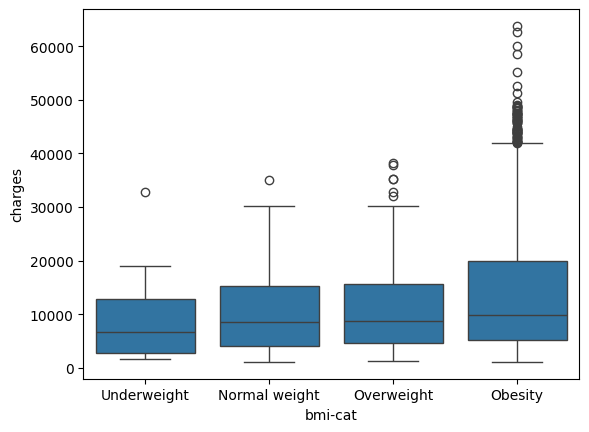

In [16]:
# Boxplot for categorical distributions
sns.boxplot(x='bmi-cat', y='charges', data=df)

# Inference

This boxplot compares insurance expenses across BMI categories.

You can observer that as BMI category increases - especially in 'Obese' - the average and variation in expenses tend to increase.

This implies that higher BMI is associated with higher medical costs.


<Axes: xlabel='smoker', ylabel='charges'>

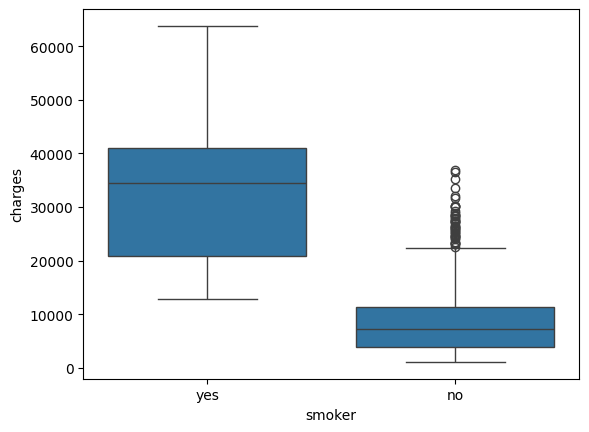

In [17]:
sns.boxplot(x='smoker', y='charges', data=df)

#Inference

We clearly see that smokers have significantly higher expenses that non smookers.

Not only is the median higher, but the spread is also wide - indication that smokeing is a major cost driver in medical insurance.

This kind of visualizaion is critical for risk segmentaion in the insurance industry.

<Axes: >

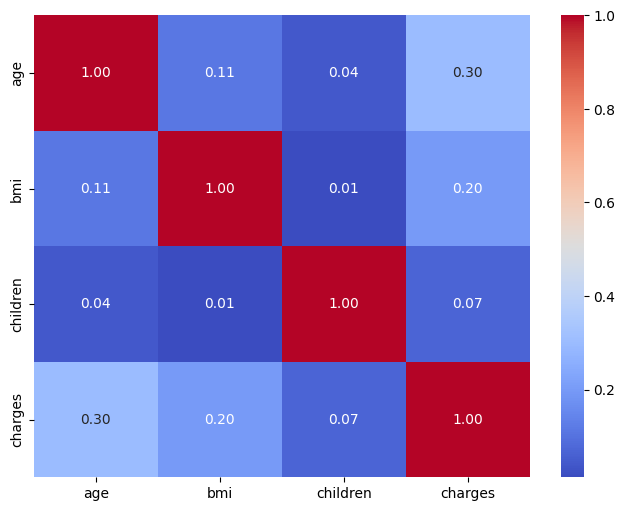

In [18]:
num_cols = ['age', 'bmi', 'children', 'charges']
corr = df[num_cols].corr()
plt.figure(figsize=(8, 6))      
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

### Check unique values for categorical fields: 

In [21]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_boxcox,log_charges,bmi-cat
0,19,female,27.900,0,yes,southwest,16884.92400,7.763291,9.734176,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,8.618976,7.453302,Obesity
2,28,male,33.000,3,no,southeast,4449.46200,8.511576,8.400538,Obesity
3,33,male,22.705,0,no,northwest,21984.47061,6.920914,9.998092,Normal weight
4,32,male,28.880,0,no,northwest,3866.85520,7.912470,8.260197,Overweight


In [27]:
for col in ['sex','smoker','region']:
    print(col,df[col].value_counts())
    print()

sex sex
male      676
female    662
Name: count, dtype: int64

smoker smoker
no     1064
yes     274
Name: count, dtype: int64

region region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64



### Target Variable Distribution
- the one variable which we want to predict

<Axes: xlabel='charges', ylabel='Count'>

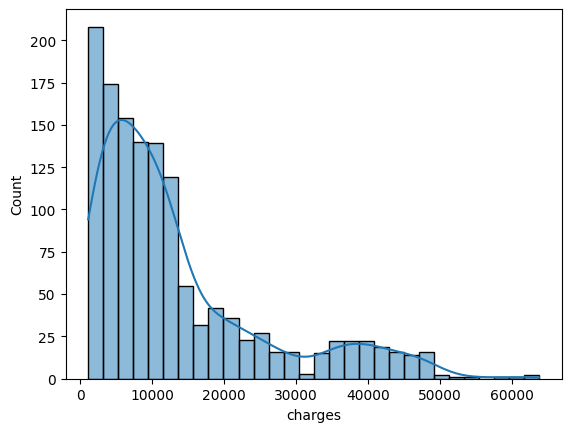

In [28]:
sns.histplot(df['charges'], kde=True)